<a href="https://colab.research.google.com/github/Uluc/nyse_nasdaq_stock_analysis/blob/main/stock_analysis_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
import numpy as np
import pandas as pd
 
import os
import io
 
data = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))
 
data = data.sort_index(axis=0, ascending=False)
data

,date,volume,open,high,low,close,adjclose
9972,1980-12-12,117258400,0.513393,0.515625,0.513393,0.513393,0.405683
9971,1980-12-15,43971200,0.488839,0.488839,0.486607,0.486607,0.384517
9970,1980-12-16,26432000,0.453125,0.453125,0.450893,0.450893,0.356296
9969,1980-12-17,21610400,0.462054,0.464286,0.462054,0.462054,0.365115
9968,1980-12-18,18362400,0.475446,0.477679,0.475446,0.475446,0.375698
...,...,...,...,...,...,...,...
4,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005
3,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999
2,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988
1,2020-07-01,27684300,365.119995,367.359985,363.910004,364.109985,364.109985


In [ ]:
data["date"] = pd.to_datetime(data["date"])
data.index = data["date"]
data

,date,volume,open,high,low,close,adjclose
date,,,,,,,
1980-12-12,1980-12-12,117258400,0.513393,0.515625,0.513393,0.513393,0.405683
1980-12-15,1980-12-15,43971200,0.488839,0.488839,0.486607,0.486607,0.384517
1980-12-16,1980-12-16,26432000,0.453125,0.453125,0.450893,0.450893,0.356296
1980-12-17,1980-12-17,21610400,0.462054,0.464286,0.462054,0.462054,0.365115
1980-12-18,1980-12-18,18362400,0.475446,0.477679,0.475446,0.475446,0.375698
...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005
2020-06-29,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999
2020-06-30,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988


In [ ]:
#previous values
data["yesterday_high"] = data["high"].shift(periods=-1)
data["yesterday_low"] = data["low"].shift(periods=-1)

In [ ]:
# Simple Moving Averages
data['open_20SMA'] = data["open"].rolling(window=20).mean()
data['open_50SMA'] = data["open"].rolling(window=50).mean()
data['open_100SMA'] = data["open"].rolling(window=100).mean()
data['open_200SMA'] = data["open"].rolling(window=200).mean()
data['open_365SMA'] = data["open"].rolling(window=365).mean()
data

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA
date,,,,,,,,,,,,,,
1980-12-12,1980-12-12,117258400,0.513393,0.515625,0.513393,0.513393,0.405683,0.488839,0.486607,NaN,NaN,NaN,NaN,NaN
1980-12-15,1980-12-15,43971200,0.488839,0.488839,0.486607,0.486607,0.384517,0.453125,0.450893,NaN,NaN,NaN,NaN,NaN
1980-12-16,1980-12-16,26432000,0.453125,0.453125,0.450893,0.450893,0.356296,0.464286,0.462054,NaN,NaN,NaN,NaN,NaN
1980-12-17,1980-12-17,21610400,0.462054,0.464286,0.462054,0.462054,0.365115,0.477679,0.475446,NaN,NaN,NaN,NaN,NaN
1980-12-18,1980-12-18,18362400,0.475446,0.477679,0.475446,0.475446,0.375698,0.506696,0.504464,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005,362.170013,351.279999,343.329002,317.029201,297.723001,281.06945,240.575507
2020-06-29,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999,365.980011,360.000000,345.104002,318.400401,298.020301,281.71170,241.123918
2020-06-30,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988,367.359985,363.910004,347.070502,320.043000,298.395401,282.41210,241.687972


In [ ]:
#Exponential Moving Averages
data["open_12EMA"] = data['open'].ewm(span=12).mean()
data["open_26EMA"] = data['open'].ewm(span=26).mean()

data

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA
date,,,,,,,,,,,,,,,,
1980-12-12,1980-12-12,117258400,0.513393,0.515625,0.513393,0.513393,0.405683,0.488839,0.486607,NaN,NaN,NaN,NaN,NaN,0.513393,0.513393
1980-12-15,1980-12-15,43971200,0.488839,0.488839,0.486607,0.486607,0.384517,0.453125,0.450893,NaN,NaN,NaN,NaN,NaN,0.500093,0.500644
1980-12-16,1980-12-16,26432000,0.453125,0.453125,0.450893,0.450893,0.356296,0.464286,0.462054,NaN,NaN,NaN,NaN,NaN,0.481761,0.483571
1980-12-17,1980-12-17,21610400,0.462054,0.464286,0.462054,0.462054,0.365115,0.477679,0.475446,NaN,NaN,NaN,NaN,NaN,0.475540,0.477556
1980-12-18,1980-12-18,18362400,0.475446,0.477679,0.475446,0.475446,0.375698,0.506696,0.504464,NaN,NaN,NaN,NaN,NaN,0.475515,0.477066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005,362.170013,351.279999,343.329002,317.029201,297.723001,281.06945,240.575507,353.433484,339.752914
2020-06-29,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999,365.980011,360.000000,345.104002,318.400401,298.020301,281.71170,241.123918,353.405256,340.752698
2020-06-30,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988,367.359985,363.910004,347.070502,320.043000,298.395401,282.41210,241.687972,354.432137,342.184349


In [ ]:
# Moving Average Convergence Divergence (MACD)
data["MACD"] = data["open_12EMA"] - data["open_26EMA"]
# MACD signal line is a 9 day EMA
data["MACD_signal_line"] = data['MACD'].ewm(span=9).mean()

data.tail(15)

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line
date,,,,,,,,,,,,,,,,,,
2020-06-12,2020-06-12,50001500,344.720001,347.799988,334.220001,338.799988,338.799988,345.679993,332.579987,323.527002,299.089400,293.858801,273.86465,234.953835,332.138923,320.083247,12.055676,10.446346
2020-06-15,2020-06-15,34702200,333.250000,345.679993,332.579987,342.989990,342.989990,353.200012,344.720001,325.172002,300.947600,294.005501,274.51040,235.442493,332.309858,321.058562,11.251296,10.607336
2020-06-16,2020-06-16,41357200,351.459991,353.200012,344.720001,352.079987,352.079987,355.399994,351.089996,327.086501,303.120800,294.340901,275.22520,236.010931,335.256032,323.310520,11.945512,10.874971
2020-06-17,2020-06-17,28532000,355.149994,355.399994,351.089996,351.589996,351.589996,353.450012,349.220001,329.092500,305.205800,294.689901,275.95015,236.587972,338.316642,325.669000,12.647642,11.229505
2020-06-18,2020-06-18,24205100,351.410004,353.450012,349.220001,351.730011,351.730011,356.559998,345.149994,330.829001,306.818000,295.103401,276.67505,237.143342,340.331005,327.575741,12.755265,11.534657
2020-06-19,2020-06-19,66119000,354.640015,356.559998,345.149994,349.720001,349.720001,359.459991,351.149994,332.628001,308.656001,295.523801,277.40630,237.705205,342.532391,329.580502,12.951890,11.818104
2020-06-22,2020-06-22,33861300,351.339996,359.459991,351.149994,358.869995,358.869995,372.380005,362.269989,334.406502,310.308801,295.792701,278.10300,238.253288,343.887407,331.192316,12.695091,11.993501
2020-06-23,2020-06-23,53038900,364.000000,372.380005,362.269989,366.529999,366.529999,368.790009,358.519989,336.431502,312.222601,296.227301,278.85275,238.832740,346.981652,333.622515,13.359138,12.266628
2020-06-24,2020-06-24,48155800,365.000000,368.790009,358.519989,360.059998,360.059998,365.000000,357.570007,338.874501,313.922601,296.668001,279.60355,239.413890,349.753706,335.946773,13.806933,12.574689


In [ ]:
# Stochastic Oscillator
# current open - lowest open / (highest open - lowest open) * 100.   | Typically done with close, but I'm doing open for everything
lookback = 14 # most common period range

data["stochastic_oscillator"] = ((data["open"] - data["open"].rolling(lookback).min()) /
                                 (data["open"].rolling(lookback).max() - data["open"].rolling(lookback).min())) * 100
# Signal line (3 day SMA of Stochstic Oscillator)
data["so_3SMA"] = data["stochastic_oscillator"].rolling(window=3).mean()

data.tail(15)

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA
date,,,,,,,,,,,,,,,,,,,,
2020-06-12,2020-06-12,50001500,344.720001,347.799988,334.220001,338.799988,338.799988,345.679993,332.579987,323.527002,299.089400,293.858801,273.86465,234.953835,332.138923,320.083247,12.055676,10.446346,86.162199,95.387400
2020-06-15,2020-06-15,34702200,333.250000,345.679993,332.579987,342.989990,342.989990,353.200012,344.720001,325.172002,300.947600,294.005501,274.51040,235.442493,332.309858,321.058562,11.251296,10.607336,51.582738,79.248312
2020-06-16,2020-06-16,41357200,351.459991,353.200012,344.720001,352.079987,352.079987,355.399994,351.089996,327.086501,303.120800,294.340901,275.22520,236.010931,335.256032,323.310520,11.945512,10.874971,100.000000,79.248312
2020-06-17,2020-06-17,28532000,355.149994,355.399994,351.089996,351.589996,351.589996,353.450012,349.220001,329.092500,305.205800,294.689901,275.95015,236.587972,338.316642,325.669000,12.647642,11.229505,100.000000,83.860913
2020-06-18,2020-06-18,24205100,351.410004,353.450012,349.220001,351.730011,351.730011,356.559998,345.149994,330.829001,306.818000,295.103401,276.67505,237.143342,340.331005,327.575741,12.755265,11.534657,90.000024,96.666675
2020-06-19,2020-06-19,66119000,354.640015,356.559998,345.149994,349.720001,349.720001,359.459991,351.149994,332.628001,308.656001,295.523801,277.40630,237.705205,342.532391,329.580502,12.951890,11.818104,98.517502,96.172509
2020-06-22,2020-06-22,33861300,351.339996,359.459991,351.149994,358.869995,358.869995,372.380005,362.269989,334.406502,310.308801,295.792701,278.10300,238.253288,343.887407,331.192316,12.695091,11.993501,88.018871,92.178799
2020-06-23,2020-06-23,53038900,364.000000,372.380005,362.269989,366.529999,366.529999,368.790009,358.519989,336.431502,312.222601,296.227301,278.85275,238.832740,346.981652,333.622515,13.359138,12.266628,100.000000,95.512124
2020-06-24,2020-06-24,48155800,365.000000,368.790009,358.519989,360.059998,360.059998,365.000000,357.570007,338.874501,313.922601,296.668001,279.60355,239.413890,349.753706,335.946773,13.806933,12.574689,100.000000,96.006290


In [ ]:
# Relative Strength Index (RSI)
window_length = 14
close = data["open"]
 
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 
 
# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
 
# Calculate the EWMA
roll_up1 = up.ewm(span=window_length).mean()
roll_down1 = down.abs().ewm(span=window_length).mean()
 
# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
data["RSI_EMA"] = 100.0 - (100.0 / (1.0 + RS1))
 
data.tail(15)

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA,RSI_EMA
date,,,,,,,,,,,,,,,,,,,,,
2020-06-12,2020-06-12,50001500,344.720001,347.799988,334.220001,338.799988,338.799988,345.679993,332.579987,323.527002,299.089400,293.858801,273.86465,234.953835,332.138923,320.083247,12.055676,10.446346,86.162199,95.387400,74.850117
2020-06-15,2020-06-15,34702200,333.250000,345.679993,332.579987,342.989990,342.989990,353.200012,344.720001,325.172002,300.947600,294.005501,274.51040,235.442493,332.309858,321.058562,11.251296,10.607336,51.582738,79.248312,53.791798
2020-06-16,2020-06-16,41357200,351.459991,353.200012,344.720001,352.079987,352.079987,355.399994,351.089996,327.086501,303.120800,294.340901,275.22520,236.010931,335.256032,323.310520,11.945512,10.874971,100.000000,79.248312,69.507133
2020-06-17,2020-06-17,28532000,355.149994,355.399994,351.089996,351.589996,351.589996,353.450012,349.220001,329.092500,305.205800,294.689901,275.95015,236.587972,338.316642,325.669000,12.647642,11.229505,100.000000,83.860913,71.753277
2020-06-18,2020-06-18,24205100,351.410004,353.450012,349.220001,351.730011,351.730011,356.559998,345.149994,330.829001,306.818000,295.103401,276.67505,237.143342,340.331005,327.575741,12.755265,11.534657,90.000024,96.666675,66.062326
2020-06-19,2020-06-19,66119000,354.640015,356.559998,345.149994,349.720001,349.720001,359.459991,351.149994,332.628001,308.656001,295.523801,277.40630,237.705205,342.532391,329.580502,12.951890,11.818104,98.517502,96.172509,68.548152
2020-06-22,2020-06-22,33861300,351.339996,359.459991,351.149994,358.869995,358.869995,372.380005,362.269989,334.406502,310.308801,295.792701,278.10300,238.253288,343.887407,331.192316,12.695091,11.993501,88.018871,92.178799,63.099665
2020-06-23,2020-06-23,53038900,364.000000,372.380005,362.269989,366.529999,366.529999,368.790009,358.519989,336.431502,312.222601,296.227301,278.85275,238.832740,346.981652,333.622515,13.359138,12.266628,100.000000,95.512124,72.703628
2020-06-24,2020-06-24,48155800,365.000000,368.790009,358.519989,360.059998,360.059998,365.000000,357.570007,338.874501,313.922601,296.668001,279.60355,239.413890,349.753706,335.946773,13.806933,12.574689,100.000000,96.006290,73.336124


In [ ]:
# Calculate the SMA
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
data["RSI_SMA"] = 100.0 - (100.0 / (1.0 + RS2))

data.tail(15)

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA,RSI_EMA,RSI_SMA
date,,,,,,,,,,,,,,,,,,,,,,
2020-06-12,2020-06-12,50001500,344.720001,347.799988,334.220001,338.799988,338.799988,345.679993,332.579987,323.527002,299.089400,293.858801,273.86465,234.953835,332.138923,320.083247,12.055676,10.446346,86.162199,95.387400,74.850117,74.756308
2020-06-15,2020-06-15,34702200,333.250000,345.679993,332.579987,342.989990,342.989990,353.200012,344.720001,325.172002,300.947600,294.005501,274.51040,235.442493,332.309858,321.058562,11.251296,10.607336,51.582738,79.248312,53.791798,57.836366
2020-06-16,2020-06-16,41357200,351.459991,353.200012,344.720001,352.079987,352.079987,355.399994,351.089996,327.086501,303.120800,294.340901,275.22520,236.010931,335.256032,323.310520,11.945512,10.874971,100.000000,79.248312,69.507133,74.171909
2020-06-17,2020-06-17,28532000,355.149994,355.399994,351.089996,351.589996,351.589996,353.450012,349.220001,329.092500,305.205800,294.689901,275.95015,236.587972,338.316642,325.669000,12.647642,11.229505,100.000000,83.860913,71.753277,75.210199
2020-06-18,2020-06-18,24205100,351.410004,353.450012,349.220001,351.730011,351.730011,356.559998,345.149994,330.829001,306.818000,295.103401,276.67505,237.143342,340.331005,327.575741,12.755265,11.534657,90.000024,96.666675,66.062326,70.780573
2020-06-19,2020-06-19,66119000,354.640015,356.559998,345.149994,349.720001,349.720001,359.459991,351.149994,332.628001,308.656001,295.523801,277.40630,237.705205,342.532391,329.580502,12.951890,11.818104,98.517502,96.172509,68.548152,73.315650
2020-06-22,2020-06-22,33861300,351.339996,359.459991,351.149994,358.869995,358.869995,372.380005,362.269989,334.406502,310.308801,295.792701,278.10300,238.253288,343.887407,331.192316,12.695091,11.993501,88.018871,92.178799,63.099665,69.260795
2020-06-23,2020-06-23,53038900,364.000000,372.380005,362.269989,366.529999,366.529999,368.790009,358.519989,336.431502,312.222601,296.227301,278.85275,238.832740,346.981652,333.622515,13.359138,12.266628,100.000000,95.512124,72.703628,72.311703
2020-06-24,2020-06-24,48155800,365.000000,368.790009,358.519989,360.059998,360.059998,365.000000,357.570007,338.874501,313.922601,296.668001,279.60355,239.413890,349.753706,335.946773,13.806933,12.574689,100.000000,96.006290,73.336124,72.842827


In [ ]:
# Bollinger Bands
data["upper_band"] = data["open"].rolling(window=20).mean() + (2 * data["open"].rolling(window=20).std())
data["middle_band"] = data["open"].rolling(window=20).mean()
data["lower_band"] = data["open"].rolling(window=20).mean() - (2 * data["open"].rolling(window=20).std())

data.tail(15)


,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA,RSI_EMA,RSI_SMA,upper_band,middle_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-12,2020-06-12,50001500,344.720001,347.799988,334.220001,338.799988,338.799988,345.679993,332.579987,323.527002,299.089400,293.858801,273.86465,234.953835,332.138923,320.083247,12.055676,10.446346,86.162199,95.387400,74.850117,74.756308,347.963278,323.527002,299.090726
2020-06-15,2020-06-15,34702200,333.250000,345.679993,332.579987,342.989990,342.989990,353.200012,344.720001,325.172002,300.947600,294.005501,274.51040,235.442493,332.309858,321.058562,11.251296,10.607336,51.582738,79.248312,53.791798,57.836366,347.365495,325.172002,302.978508
2020-06-16,2020-06-16,41357200,351.459991,353.200012,344.720001,352.079987,352.079987,355.399994,351.089996,327.086501,303.120800,294.340901,275.22520,236.010931,335.256032,323.310520,11.945512,10.874971,100.000000,79.248312,69.507133,74.171909,351.423272,327.086501,302.749729
2020-06-17,2020-06-17,28532000,355.149994,355.399994,351.089996,351.589996,351.589996,353.450012,349.220001,329.092500,305.205800,294.689901,275.95015,236.587972,338.316642,325.669000,12.647642,11.229505,100.000000,83.860913,71.753277,75.210199,355.748367,329.092500,302.436634
2020-06-18,2020-06-18,24205100,351.410004,353.450012,349.220001,351.730011,351.730011,356.559998,345.149994,330.829001,306.818000,295.103401,276.67505,237.143342,340.331005,327.575741,12.755265,11.534657,90.000024,96.666675,66.062326,70.780573,358.582556,330.829001,303.075445
2020-06-19,2020-06-19,66119000,354.640015,356.559998,345.149994,349.720001,349.720001,359.459991,351.149994,332.628001,308.656001,295.523801,277.40630,237.705205,342.532391,329.580502,12.951890,11.818104,98.517502,96.172509,68.548152,73.315650,361.693757,332.628001,303.562246
2020-06-22,2020-06-22,33861300,351.339996,359.459991,351.149994,358.869995,358.869995,372.380005,362.269989,334.406502,310.308801,295.792701,278.10300,238.253288,343.887407,331.192316,12.695091,11.993501,88.018871,92.178799,63.099665,69.260795,363.481979,334.406502,305.331025
2020-06-23,2020-06-23,53038900,364.000000,372.380005,362.269989,366.529999,366.529999,368.790009,358.519989,336.431502,312.222601,296.227301,278.85275,238.832740,346.981652,333.622515,13.359138,12.266628,100.000000,95.512124,72.703628,72.311703,367.855200,336.431502,305.007804
2020-06-24,2020-06-24,48155800,365.000000,368.790009,358.519989,360.059998,360.059998,365.000000,357.570007,338.874501,313.922601,296.668001,279.60355,239.413890,349.753706,335.946773,13.806933,12.574689,100.000000,96.006290,73.336124,72.842827,371.238977,338.874501,306.510025


In [ ]:
#significant changes in price due to volume
data["intraday_intensity_index"] = ((data["close"]*2)-data["high"]-data["low"])/((data["high"]-data["low"])*data["volume"])

In [ ]:
#clear all the dates in the 1980s that are not filled up
data = data.dropna()
data.head()

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA,RSI_EMA,RSI_SMA,upper_band,middle_band,lower_band,intraday_intensity_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,
1982-05-25,1982-05-25,12891200,0.256696,0.258929,0.256696,0.256696,0.202842,0.256696,0.254464,0.268080,0.284464,0.311094,0.327946,0.405272,0.261898,0.271112,-0.009214,-0.008343,11.764738,9.803962,33.795453,26.086967,0.293330,0.268080,0.242831,-7.757230e-08
1982-05-26,1982-05-26,10819200,0.256696,0.256696,0.254464,0.254464,0.201078,0.252232,0.250000,0.267746,0.284241,0.309710,0.327020,0.404568,0.261097,0.270044,-0.008947,-0.008464,11.764738,11.764738,33.795453,19.047610,0.293431,0.267746,0.242060,-9.242828e-08
1982-05-27,1982-05-27,7812000,0.252232,0.252232,0.250000,0.250000,0.197550,0.252232,0.250000,0.267299,0.284196,0.308460,0.326127,0.403920,0.259733,0.268724,-0.008991,-0.008569,0.000000,7.843159,27.049562,9.523831,0.293765,0.267299,0.240833,-1.280082e-07
1982-05-28,1982-05-28,4799200,0.250000,0.252232,0.250000,0.250000,0.197550,0.247768,0.245536,0.266629,0.283750,0.307254,0.325290,0.403364,0.258236,0.267337,-0.009101,-0.008676,0.000000,3.921579,24.256248,9.523831,0.294167,0.266629,0.239092,-2.083681e-07
1982-06-01,1982-06-01,11900000,0.247768,0.247768,0.245536,0.245536,0.194022,0.252232,0.250000,0.265402,0.282768,0.306295,0.324464,0.402776,0.256626,0.265888,-0.009262,-0.008793,0.000000,0.000000,21.673727,11.111132,0.294038,0.265402,0.236765,-8.403361e-08


In [ ]:
data1yr = data.tail(260)
data1mo = data.tail(21)
data1wk = data.tail(5)
data = data.tail(730)

In [ ]:
alpha = 1/21

data['H-L'] = data['high'] - data['low']
data['H-C'] = np.abs(data['high'] - data['close'].shift(1))
data['L-C'] = np.abs(data['low'] - data['close'].shift(1))
data['TR'] = data[['H-L', 'H-C', 'L-C']].max(axis=1)

data['ATR'] = data['TR'].ewm(alpha=alpha, adjust=False).mean()

data['H-pH'] = data['high'] - data['high'].shift(1)
data['pL-L'] = data['low'].shift(1) - data['low']
data['+DX'] = np.where(
    (data['H-pH'] > data['pL-L']) & (data['H-pH']>0),
    data['H-pH'],
    0.0
)

data['-DX'] = np.where(
    (data['H-pH'] < data['pL-L']) & (data['pL-L']>0),
    data['pL-L'],
    0.0
)
del data['H-pH'], data['pL-L']

# +- DMI
data['S+DM'] = data['+DX'].ewm(alpha=alpha, adjust=False).mean()
data['S-DM'] = data['-DX'].ewm(alpha=alpha, adjust=False).mean()
data['+DMI'] = (data['S+DM']/data['ATR'])*100
data['-DMI'] = (data['S-DM']/data['ATR'])*100

#delete unnecesary rows
del data['S+DM'], data['S-DM']

# ADX
data['DX'] = (np.abs(data['+DMI'] - data['-DMI'])/(data['+DMI'] + data['-DMI']))*100
data['ADX'] = data['DX'].ewm(alpha=alpha, adjust=False).mean()

data.tail(10)

#delete unnecesary rows
# del data['DX'], data['ATR'], data['TR'], data['-DX'], data['+DX'], data['+DMI'], data['-DMI']
# data["ADX"]

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA,RSI_EMA,RSI_SMA,upper_band,middle_band,lower_band,intraday_intensity_index,ADX,trend,obv,BBW,TR,ATR,+DX,-DX,+DMI,-DMI,DX,H-L,H-C,L-C
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-18,2020-06-18,24205100,351.410004,353.450012,349.220001,351.730011,351.730011,356.559998,345.149994,330.829001,306.818000,295.103401,276.67505,237.143342,340.331005,327.575741,12.755265,11.534657,90.000024,96.666675,66.062326,70.780573,358.582556,330.829001,303.075445,7.715844e-09,30.323372,Strong,312659200,0.167782,4.230011,8.743154,0.000000,1.869995,32.852750,15.256446,36.575760,4.230011,1.860016,2.369995
2020-06-19,2020-06-19,66119000,354.640015,356.559998,345.149994,349.720001,349.720001,359.459991,351.149994,332.628001,308.656001,295.523801,277.40630,237.705205,342.532391,329.580502,12.951890,11.818104,98.517502,96.172509,68.548152,73.315650,361.693757,332.628001,303.562246,-3.008927e-09,30.320979,Strong,246540200,0.174764,11.410004,8.870147,0.000000,4.070007,30.840382,16.506893,30.273102,11.410004,4.829987,6.580017
2020-06-22,2020-06-22,33861300,351.339996,359.459991,351.149994,358.869995,358.869995,372.380005,362.269989,334.406502,310.308801,295.792701,278.10300,238.253288,343.887407,331.192316,12.695091,11.993501,88.018871,92.178799,63.099665,69.260795,363.481979,334.406502,305.331025,2.533876e-08,30.429509,Strong,280401500,0.173893,9.739990,8.911568,2.899994,0.000000,30.784886,15.647780,32.600123,8.309998,9.739990,1.429993
2020-06-23,2020-06-23,53038900,364.000000,372.380005,362.269989,366.529999,366.529999,368.790009,358.519989,336.431502,312.222601,296.227301,278.85275,238.832740,346.981652,333.622515,13.359138,12.266628,100.000000,95.512124,72.703628,72.311703,367.855200,336.431502,305.007804,-2.965171e-09,30.966275,Strong,333440400,0.186806,13.510010,9.130541,12.920013,0.000000,35.354047,14.545244,41.701600,10.110016,13.510010,3.399994
2020-06-24,2020-06-24,48155800,365.000000,368.790009,358.519989,360.059998,360.059998,365.000000,357.570007,338.874501,313.922601,296.668001,279.60355,239.413890,349.753706,335.946773,13.806933,12.574689,100.000000,96.006290,73.336124,72.842827,371.238977,338.874501,306.510025,-1.453815e-08,31.210764,Strong,285284600,0.191012,10.270020,9.184802,0.000000,3.750000,33.471607,15.714982,36.100540,10.270020,2.260010,8.010010
2020-06-25,2020-06-25,34380600,360.700012,365.000000,357.570007,364.839996,364.839996,365.320007,353.019989,341.071002,315.488601,297.232001,280.33775,239.988822,351.437753,337.780346,13.657407,12.791233,87.625934,95.875311,65.774340,70.265876,373.079826,341.071002,309.062179,2.783344e-08,31.376179,Strong,319665200,0.187696,7.429993,9.101240,0.000000,0.949982,32.170404,15.601110,34.684465,7.429993,4.940002,2.489990
2020-06-26,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005,362.170013,351.279999,343.329002,317.029201,297.723001,281.06945,240.575507,353.433484,339.752914,13.680570,12.969100,98.204514,95.276816,68.960547,69.199644,375.227738,343.329002,311.430267,-1.755480e-08,31.214811,Strong,268351000,0.185820,12.300018,9.253563,0.000000,4.550018,30.134140,16.955069,27.987455,12.300018,0.480011,11.820007
2020-06-29,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999,365.980011,360.000000,345.104002,318.400401,298.020301,281.71170,241.123918,353.405256,340.752698,12.652558,12.905792,62.992126,82.940858,52.119717,60.745185,374.890586,345.104002,315.317419,2.842405e-08,30.941825,Strong,301012500,0.172624,10.890015,9.331489,0.000000,1.739990,28.459517,16.900763,25.482106,10.890015,8.540009,2.350006
2020-06-30,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988,367.359985,363.910004,347.070502,320.043000,298.395401,282.41210,241.687972,354.432137,342.184349,12.247789,12.774191,84.503895,81.900178,59.162238,56.819706,375.

In [ ]:
def trending(row):
    if row['ADX'] < 25:
      return "Absent"
    elif row['ADX'] < 50:
      return "Strong"
    elif row['ADX'] < 50:
      return "Very Strong"
    else:
      return "Extremly Strong"

data['trend'] = data.apply(lambda x : trending(x), axis=1) 
data['trend']

date
2017-08-08    Extremly Strong
2017-08-09    Extremly Strong
2017-08-10    Extremly Strong
2017-08-11    Extremly Strong
2017-08-14    Extremly Strong
                   ...       
2020-06-25             Strong
2020-06-26             Strong
2020-06-29             Strong
2020-06-30             Strong
2020-07-01             Strong
Name: trend, Length: 730, dtype: object

In [ ]:
data['obv'] = np.where(data['close'] > data['close'].shift(1), data['volume'], 
np.where(data['close'] < data['close'].shift(1), -data['volume'], data.iloc[0]['volume'])).cumsum()

In [ ]:
!pip install mpl_finance

In [ ]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
from matplotlib import gridspec

<Figure size 1440x720 with 0 Axes>

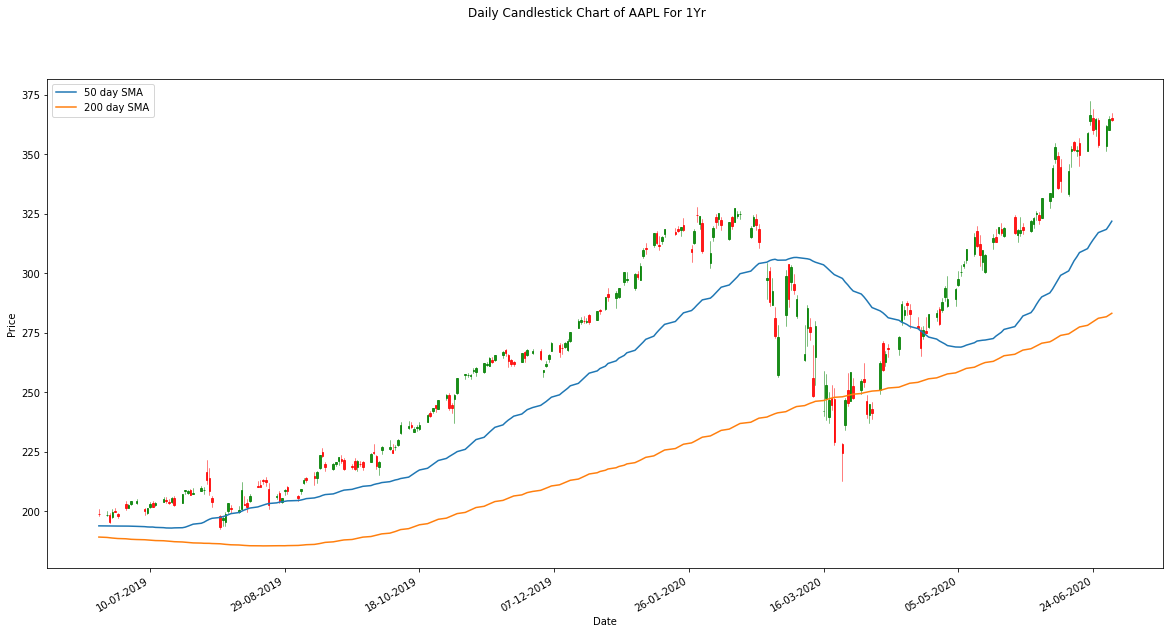

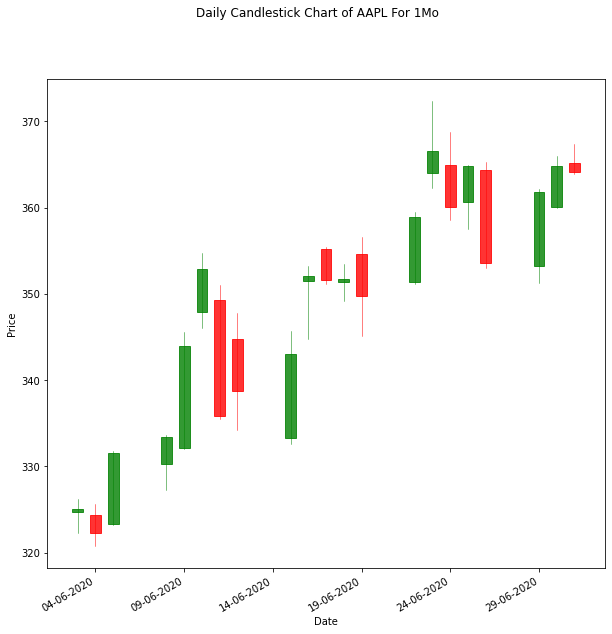

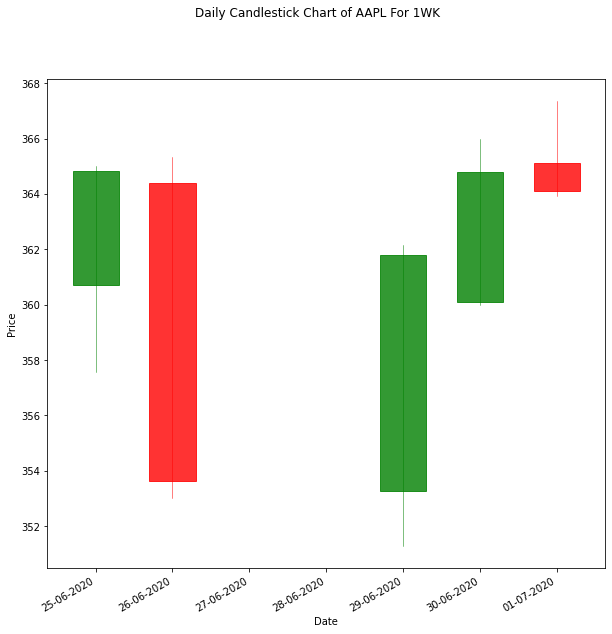

In [ ]:
ohlc1yr = data1yr.loc[:,['date','open','high','low','close']]
ohlc1mo = data1mo.loc[:,['date','open','high','low','close']]
ohlc1wk = data1wk.loc[:,['date','open','high','low','close']]

year_dates = ohlc1yr['date'].size
month_dates = ohlc1mo['date'].size
week_dates = ohlc1wk['date'].size

ohlc1yr['date'] = pd.to_datetime(ohlc1yr['date'])
ohlc1yr['date'] = ohlc1yr['date'].apply(mpl_dates.date2num)

ohlc1mo['date'] = pd.to_datetime(ohlc1mo['date'])
ohlc1mo['date'] = ohlc1mo['date'].apply(mpl_dates.date2num)

ohlc1wk['date'] = pd.to_datetime(ohlc1wk['date'])
ohlc1wk['date'] = ohlc1wk['date'].apply(mpl_dates.date2num)


ohlc1yr = ohlc1yr.astype(float)
ohlc1mo = ohlc1mo.astype(float)
ohlc1wk = ohlc1wk.astype(float)

date_format = mpl_dates.DateFormatter('%d-%m-%Y')

plt.figure(figsize=(20, 10))

# Creating Subplots
fig, ax = plt.subplots(figsize=(20, 10))
candlestick_ohlc(ax, ohlc1yr.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.plot(ohlc1yr['date'], data["open_50SMA"].tail(year_dates), label= "50 day SMA")
plt.plot(ohlc1yr['date'], data["open_200SMA"].tail(year_dates), label= "200 day SMA")
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of AAPL For 1Yr')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.legend()

fig, ax = plt.subplots(figsize=(10, 10))
candlestick_ohlc(ax, ohlc1mo.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of AAPL For 1Mo')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig, ax = plt.subplots(figsize=(10, 10))
candlestick_ohlc(ax, ohlc1wk.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of AAPL For 1WK')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.show()


In [ ]:
last_50 = data["open_50SMA"].head(1).item()
last_200 = data["open_200SMA"].head(1).item()
list_50SMA = data["open_50SMA"].tail(data["open_50SMA"].size - 1)
list_200SMA = data["open_200SMA"].tail(data["open_200SMA"].size - 1)

for i, (x,y) in enumerate(zip(list_50SMA,list_200SMA)):

  if (last_50 > last_200):
    if (x < y):
      print("Bearish Signal: Death Cross")
      print(list_50SMA.index[i].date())
  elif (last_50 < last_200):
    if (x > y):
      print("Bullish Signal: Golden Cross")
      print(list_50SMA.index[i].date())
  
  last_50 = x
  last_200 = y

ValueError: ignored

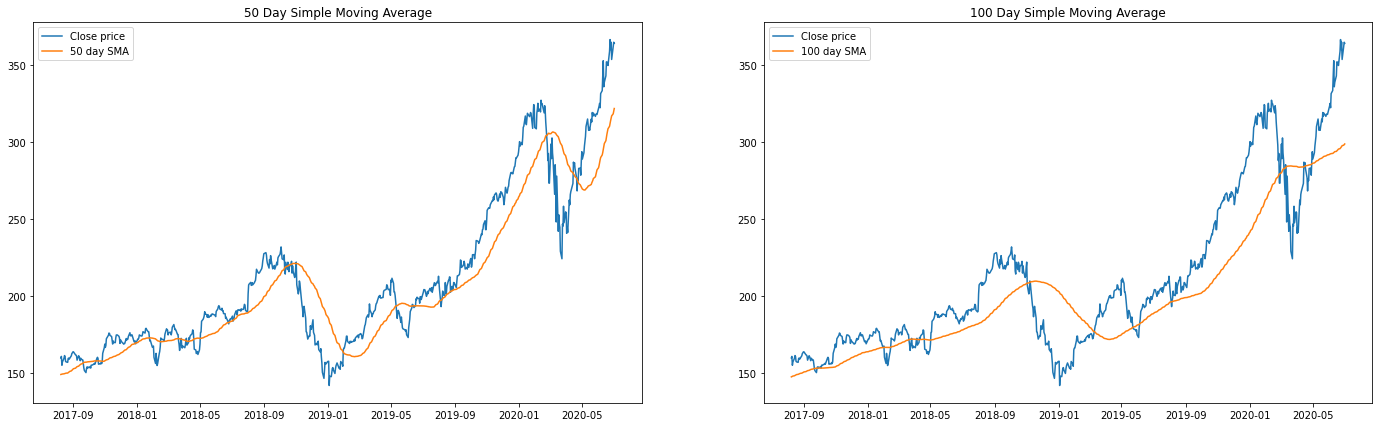

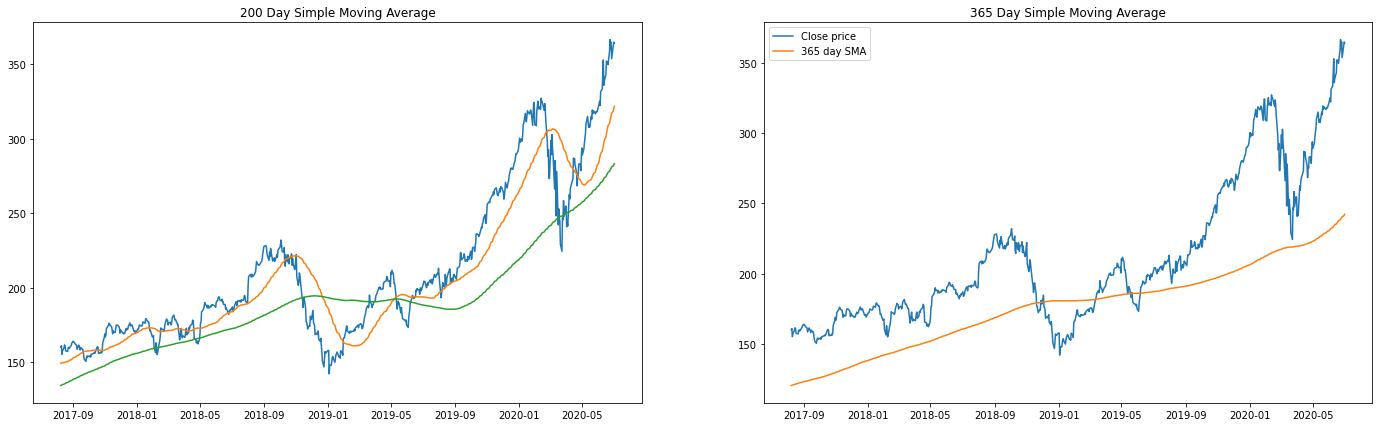

In [ ]:
#50 & 100 day SMA
plt.figure(figsize=(24,7))

plt.subplot(1, 2, 1)
graph = plt.plot(data["date"], data["close"], label= "Close price")
graph = plt.plot(data["date"], data["open_50SMA"], label= "50 day SMA")
plt.title("50 Day Simple Moving Average")
plt.legend()

plt.subplot(1, 2, 2)
graph = plt.plot(data["date"], data["close"], label= "Close price")
graph = plt.plot(data["date"], data["open_100SMA"], label= "100 day SMA")
plt.title("100 Day Simple Moving Average")
plt.legend()

#200 & 365 day SMA
plt.figure(figsize=(24,7))

plt.subplot(1, 2, 1)
graph = plt.plot(data["date"], data["close"], label= "Close price")
graph = plt.plot(data["date"], data["open_50SMA"], label= "200 day SMA")
graph = plt.plot(data["date"], data["open_200SMA"], label= "200 day SMA")
plt.title("200 Day Simple Moving Average")

plt.subplot(1, 2, 2)
graph = plt.plot(data["date"], data["close"], label= "Close price")
graph = plt.plot(data["date"], data["open_365SMA"], label= "365 day SMA")
plt.title("365 Day Simple Moving Average")
plt.legend()

plt.show()

In [ ]:
list_RSI = data["RSI_SMA"]
currentStatus = ""

for i, x in enumerate(list_RSI):

  if (x > 70):
      print("Overbougt Good Selling Point Stock Price: ", data["close"].values[i])
      print("Stock Price: ", data["close"].values[i])
      print(list_RSI.index[i].date())
  elif (x<30):
    print("Oversold Good Purchase Point Stock Price: ", data["close"].values[i])
    print(list_RSI.index[i].date())

Oversold Good Purchase Point Stock Price:  153.38999938964844
2017-09-21
Oversold Good Purchase Point Stock Price:  151.88999938964844
2017-09-22
Oversold Good Purchase Point Stock Price:  150.5500030517578
2017-09-25
Oversold Good Purchase Point Stock Price:  153.13999938964844
2017-09-26
Overbougt Good Selling Point Stock Price:  156.0
Stock Price:  156.0
2017-10-12
Overbougt Good Selling Point Stock Price:  156.99000549316406
Stock Price:  156.99000549316406
2017-10-13
Overbougt Good Selling Point Stock Price:  159.8800048828125
Stock Price:  159.8800048828125
2017-10-16
Overbougt Good Selling Point Stock Price:  160.47000122070312
Stock Price:  160.47000122070312
2017-10-17
Overbougt Good Selling Point Stock Price:  159.75999450683594
Stock Price:  159.75999450683594
2017-10-18
Overbougt Good Selling Point Stock Price:  166.72000122070312
Stock Price:  166.72000122070312
2017-10-30
Overbougt Good Selling Point Stock Price:  169.0399932861328
Stock Price:  169.0399932861328
2017-10-

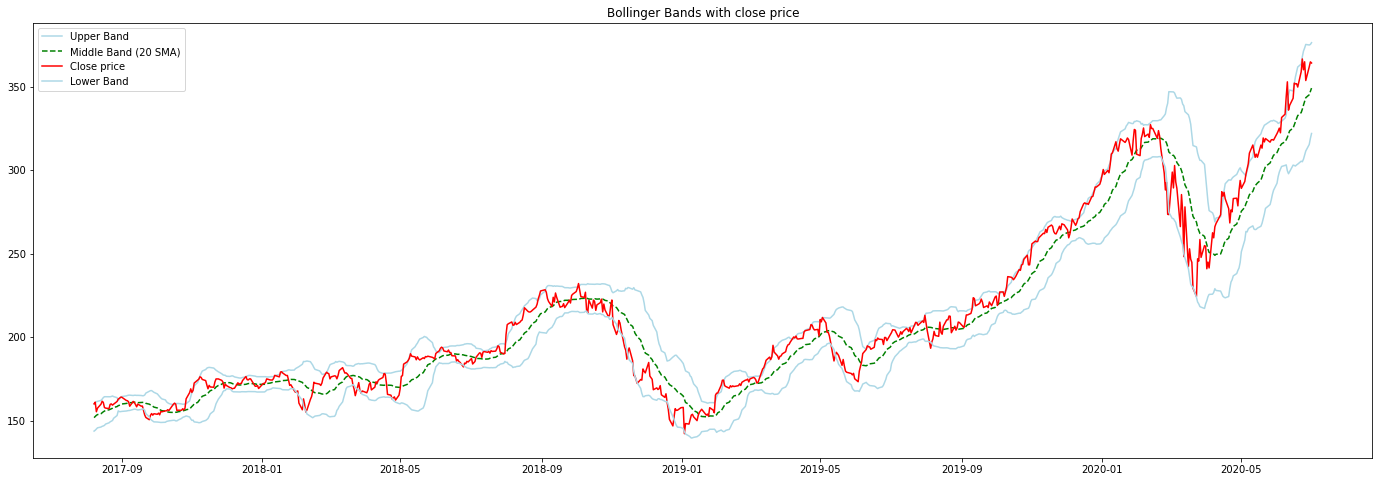

In [ ]:
plt.figure(figsize=(24,8))
graph = plt.plot(data["date"], data["upper_band"], label= "Upper Band", color="lightblue")
graph = plt.plot(data["date"], data["middle_band"], '--', label= "Middle Band (20 SMA)", color="green")
graph = plt.plot(data["date"], data["close"], label= "Close price", color="red")
graph = plt.plot(data["date"], data["lower_band"], label= "Lower Band", color="lightblue")
plt.legend(loc = "upper left")
plt.title("Bollinger Bands with close price")

plt.show()

In [ ]:
data["BBW"]= (data["upper_band"] - data["lower_band"])/data["middle_band"]
data["BBW"]

#squeeze identified at a 6 month min

date
2017-08-08    0.106130
2017-08-09    0.107675
2017-08-10    0.106601
2017-08-11    0.103040
2017-08-14    0.103406
                ...   
2020-06-25    0.187696
2020-06-26    0.185820
2020-06-29    0.172624
2020-06-30    0.162305
2020-07-01    0.155736
Name: BBW, Length: 730, dtype: float64

In [ ]:
#52 week high-low
ftwk = data.tail(260)
high = ftwk['high'].max()
low = ftwk['low'].min()

print("The 52 week high is: ", high)
print("The 52 week low is: ", low)

The 52 week high is:  372.3800048828125
The 52 week low is:  192.5800018310547


In [ ]:
#Rate of Change WIP
data2 = data.tail(1)
rclp = data2['close'].values[0]
data3 = data.tail(142)
pclp = data3['close'].values[0]
print("recent closing price ",rclp)
print("past closing price ", pclp)
#data2
#data3

recent closing price  364.1099853515625
past closing price  266.92001342773443


In [ ]:
data3

,date,volume,open,high,low,close,adjclose,yesterday_high,yesterday_low,open_20SMA,open_50SMA,open_100SMA,open_200SMA,open_365SMA,open_12EMA,open_26EMA,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA,RSI_EMA,RSI_SMA,upper_band,middle_band,lower_band,intraday_intensity_index,ADX,trend,obv,BBW
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-09,2019-12-09,32010600,270.000000,270.799988,264.910004,266.920013,265.569122,270.070007,265.859985,264.183998,248.921598,229.710799,211.133599,202.518191,264.693909,260.050912,4.642996,5.436187,100.000000,84.254536,66.393294,55.922179,270.483465,264.183998,257.884531,-9.918031e-09,27.664365,Strong,318118500,0.047690
2019-12-10,2019-12-10,22605100,268.600006,270.070007,265.859985,268.480011,267.121246,271.100006,268.500000,264.698999,249.875598,230.338899,211.608049,202.749698,265.294847,260.684178,4.610668,5.271083,88.024007,94.548207,61.524829,51.006922,270.647385,264.698999,258.750613,1.082328e-08,27.293945,Strong,340723600,0.044945
2019-12-11,2019-12-11,19689200,268.809998,271.100006,268.500000,270.769989,269.399658,272.559998,267.320007,265.062000,250.750398,230.990499,212.086049,202.975781,265.835639,261.286091,4.549548,5.126776,89.820341,92.614782,62.006993,55.013780,271.086848,265.062000,259.037151,3.789597e-08,27.028293,Strong,360412800,0.045460
2019-12-12,2019-12-12,34327600,267.779999,272.559998,267.320007,271.459991,270.086151,275.299988,270.929993,265.394499,251.644798,231.583699,212.553349,203.205808,266.134771,261.767121,4.367650,4.974951,81.009403,86.284584,57.900425,56.432833,271.236905,265.394499,259.552093,1.690038e-08,26.897841,Strong,394740400,0.044028
2019-12-13,2019-12-13,33396900,271.459991,275.299988,270.929993,275.149994,273.757477,280.790009,276.980011,265.779999,252.705398,232.221599,213.039249,203.435041,266.954036,262.485112,4.468924,4.873746,100.000000,90.276581,66.929402,62.903690,272.158396,265.779999,259.401602,2.788740e-08,26.992945,Strong,428137300,0.047998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25,2020-06-25,34380600,360.700012,365.000000,357.570007,364.839996,364.839996,365.320007,353.019989,341.071002,315.488601,297.232001,280.337750,239.988822,351.437753,337.780346,13.657407,12.791233,87.625934,95.875311,65.774340,70.265876,373.079826,341.071002,309.062179,2.783344e-08,31.376179,Strong,319665200,0.187696
2020-06-26,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005,362.170013,351.279999,343.329002,317.029201,297.723001,281.069450,240.575507,353.433484,339.752914,13.680570,12.969100,98.204514,95.276816,68.960547,69.199644,375.227738,343.329002,311.430267,-1.755480e-08,31.214811,Strong,268351000,0.185820
2020-06-29,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999,365.980011,360.000000,345.104002,318.400401,298.020301,281.711700,241.123918,353.405256,340.752698,12.652558,12.905792,62.992126,82.940858,52.119717,60.745185,374.890586,345.104002,315.317419,2.842405e-08,30.941825,Strong,301012500,0.172624


In [ ]:
ohlc1yr = data.loc[:,['date','open','high','low','close']]
ohlc1yr['date'] = pd.to_datetime(ohlc1yr['date'])
ohlc1yr['date'] = ohlc1yr['date'].apply(mpl_dates.date2num)
ohlc1yr = ohlc1yr.astype(float)
date_format = mpl_dates.DateFormatter('%d-%m-%Y')

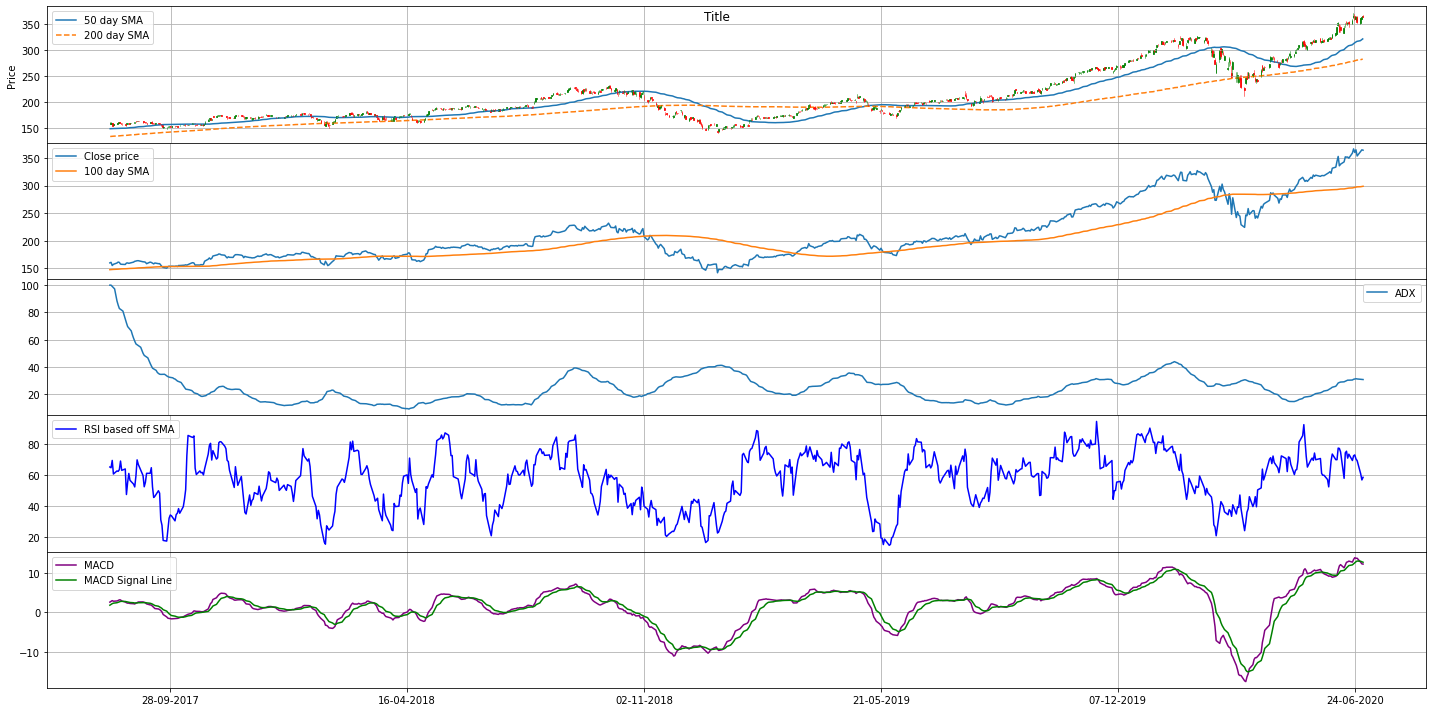

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



#ohlc1yr = data1yr.loc[:,['date','open','high','low','close']]
#ohlc1yr['date'] = pd.to_datetime(ohlc1yr['date'])
#ohlc1yr['date'] = ohlc1yr['date'].apply(mpl_dates.date2num)
#ohlc1yr = ohlc1yr.astype(float)
#date_format = mpl_dates.DateFormatter('%d-%m-%Y')


# Creating Subplots
#fig, (ax1,ax2) = plt.subplots(figsize=(20, 10), nrows=2, sharex=True, gridspec_kw=dict(height_ratios=[2, 1]), subplot_kw=dict(frameon=True))
fig = plt.figure(figsize=(20, 10), tight_layout=True)
gs = GridSpec(nrows=5, ncols=1, figure=fig, hspace=.0)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])
ax4 = fig.add_subplot(gs[3, :])
ax5 = fig.add_subplot(gs[4, :])

#create gridlines on subgraphs
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()

#Plotting Candlestick on top of 50 & 200 day SMA
ax1.plot(ohlc1yr['date'], data["open_50SMA"], label= "50 day SMA")
ax1.plot(ohlc1yr['date'], data["open_200SMA"], label= "200 day SMA", linestyle='--')
candlestick_ohlc(ax1, ohlc1yr.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax2.set_xlabel('Date')
ax1.set_ylabel('Price')
fig.suptitle('Title')

#Date formatting (only needs to be done on the last axis)
ax5.xaxis.set_major_formatter(date_format)

#fig.autofmt_xdate()

#Plotting 100 day SMA
ax2.plot(ohlc1yr["date"], data["close"], label= "Close price")
ax2.plot(ohlc1yr["date"], data["open_100SMA"], label= "100 day SMA")

ax3.plot(ohlc1yr["date"], data["ADX"], label= "ADX")

ax4.plot(ohlc1yr["date"], data["RSI_SMA"], label= "RSI based off SMA", color="blue")

ax5.plot(ohlc1yr["date"], data["MACD"], label= "MACD", color="purple")
ax5.plot(ohlc1yr["date"], data["MACD_signal_line"], label= "MACD Signal Line", color="green")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

plt.show()




#plt.figure(figsize=(24,7))

#plt.subplot(1, 2, 1)
#graph = plt.plot(data["date"], data["RSI_SMA"], label= "RSI based off SMA", color="blue")
#plt.legend(loc = "upper left")
#plt.title("Relative Strength Index based off 14 day SMA")

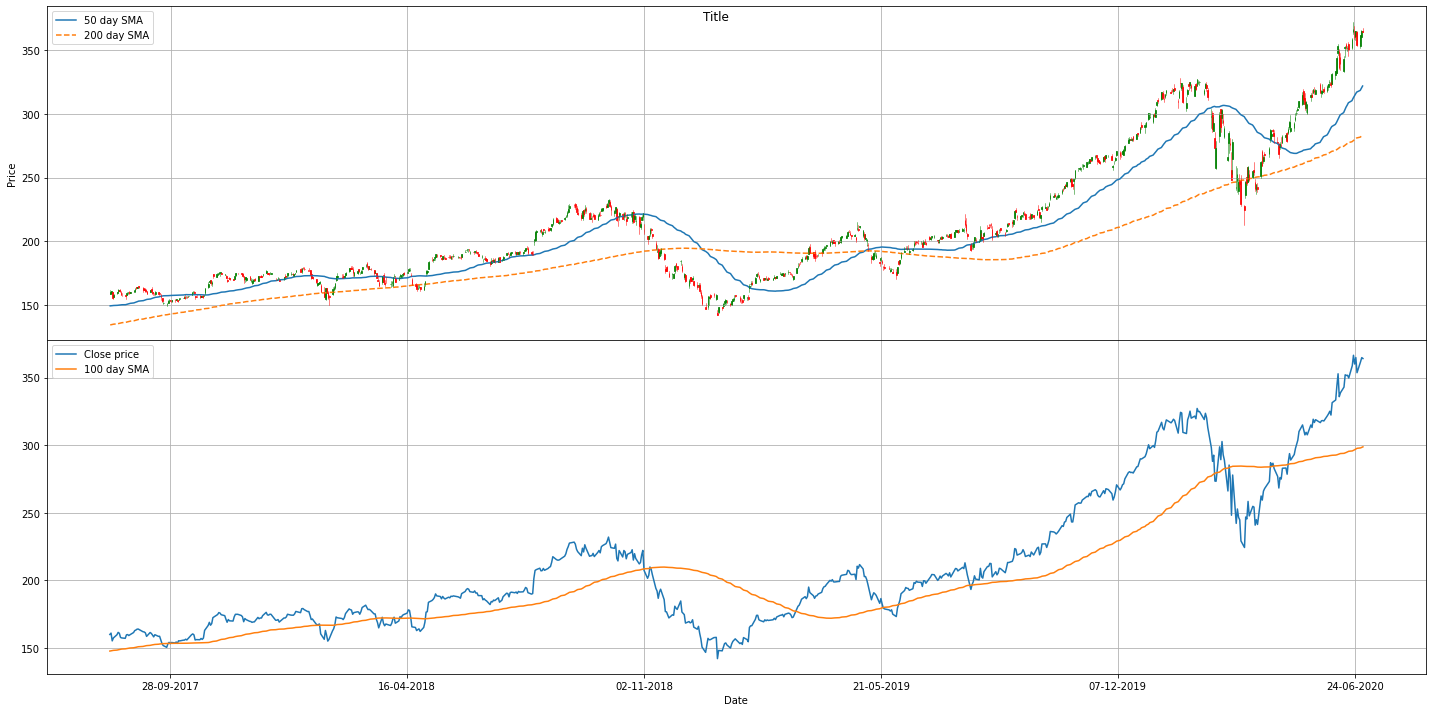

In [ ]:
fig = plt.figure(figsize=(20, 10), tight_layout=True)
gs = GridSpec(nrows=2, ncols=1, figure=fig, hspace=.0)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])


#create gridlines on subgraphs
ax1.grid()
ax2.grid()


#Plotting Candlestick on top of 50 & 200 day SMA
ax1.plot(ohlc1yr['date'], data["open_50SMA"], label= "50 day SMA")
ax1.plot(ohlc1yr['date'], data["open_200SMA"], label= "200 day SMA", linestyle='--')
candlestick_ohlc(ax1, ohlc1yr.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax2.set_xlabel('Date')
ax1.set_ylabel('Price')
fig.suptitle('Title')

#Date formatting
ax1.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_formatter(date_format)
#fig.autofmt_xdate()

#Plotting 100 day SMA
ax2.plot(ohlc1yr["date"], data["close"], label= "Close price")
ax2.plot(ohlc1yr["date"], data["open_100SMA"], label= "100 day SMA")


ax1.legend()
ax2.legend()


plt.show()